### Histograms, KDE Plots, Violin Plots, Box Plots

In [18]:
import pandas as pd
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = 10
gdp = pd.read_csv("gdp.csv")
pop = pd.read_csv("population.csv")
pop = pop.rename(columns = {"Total population (Gapminder, HYDE & UN)" : "population"})
gdp2017 = gdp.query("Year == 2017")
pop2017 = pop.query("Year == 2017")
gdp_and_pop_2017 = pd.merge(left = gdp2017, right = pop2017, left_on = "Entity", right_on = "Entity", how = "outer")
gdp_and_pop_2017["gdp_per_capita"] = gdp_and_pop_2017["GDP (constant 2010 US$)"] / gdp_and_pop_2017["population"]
gdp_and_pop = pd.merge(left = gdp, right = pop, left_on = ["Entity", "Year"], right_on = ["Entity", "Year"], how = "left")
gdp_and_pop["gdp_per_capita"] = gdp_and_pop["GDP (constant 2010 US$)"] / gdp_and_pop["population"]
gdp_and_pop_by_entity = gdp_and_pop.set_index("Entity")
gdp_per_capitas_1960 = gdp_and_pop_by_entity.query("Year == 1960")[["gdp_per_capita"]]
gdp_and_pop_by_entity["gdp_per_capita_ratio"] = gdp_and_pop_by_entity["gdp_per_capita"] / gdp_per_capitas_1960["gdp_per_capita"]
gdp_and_pop = gdp_and_pop_by_entity.reset_index()
gdp_per_cap_ratio_history = gdp_and_pop.dropna()
gdp_and_pop_by_entity = gdp_per_cap_ratio_history.set_index("Entity")
gdp_and_pop_by_entity["pop_ratio"] = gdp_and_pop_by_entity["population"] / gdp_and_pop_by_entity.query("Year == 1960")["population"]
gdp_and_pop_by_entity["gdp_ratio"] = gdp_and_pop_by_entity["GDP (constant 2010 US$)"] / gdp_and_pop_by_entity.query("Year == 1960")["GDP (constant 2010 US$)"]
gdp_and_pop = gdp_and_pop_by_entity.reset_index()
life_exp = pd.read_csv("life_expectancy.csv")
life_exp = life_exp.rename(columns = {"Life expectancy at birth (historical)":"Life expectancy"})
life_exp = life_exp[["Entity","Year","Life expectancy"]]
gdp_pop_le = pd.merge(left = gdp_and_pop, right = life_exp, left_on = ["Entity","Year"], right_on = ["Entity", "Year"], how = "left")
continents = pd.read_excel("Continent List.xlsx")

In [19]:
px.histogram(gdp_pop_le.query("Year == 2017")["Life expectancy"])

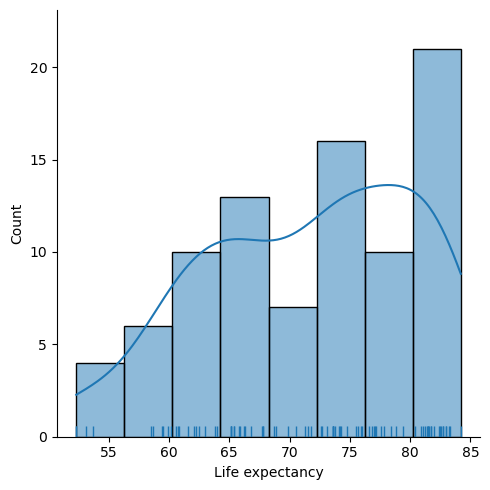

In [20]:
sns.displot(gdp_pop_le.query("Year == 2017")["Life expectancy"], kde = True, rug = True)

In [21]:
# now with a kde ANS rug plot 

In [22]:
# basic violin plot , showing sidewise KDEs
px.violin(gdp_pop_le.query("Year == 2017")["Life expectancy"], points = "all")

In [23]:
continents

Continent         Country
0             Asia     Afghanistan
1           Europe         Albania
2           Africa         Algeria
3          Oceania  American Samoa
4           Europe         Andorra
..             ...             ...
201           Asia         Vietnam
202  North America  Virgin Islands
203           Asia           Yemen
204         Africa          Zambia
205         Africa        Zimbabwe

[206 rows x 2 columns]

In [25]:
gdp_pop_le = pd.merge(left = gdp_pop_le, right = continents, left_on = "Entity", right_on = "Country", how = "left")
gdp_pop_le

Entity Code_x  Year  GDP (constant 2010 US$) Code_y  population  \
0      Algeria    DZA  1960             2.743440e+10    DZA  11058000.0   
1      Algeria    DZA  1961             2.370183e+10    DZA  11336000.0   
2      Algeria    DZA  1962             1.903611e+10    DZA  11620000.0   
3      Algeria    DZA  1963             2.556811e+10    DZA  11913000.0   
4      Algeria    DZA  1964             2.706114e+10    DZA  12222000.0   
...        ...    ...   ...                      ...    ...         ...   
5207  Zimbabwe    ZWE  2013             1.418193e+10    ZWE  13350000.0   
5208  Zimbabwe    ZWE  2014             1.448359e+10    ZWE  13587000.0   
5209  Zimbabwe    ZWE  2015             1.472830e+10    ZWE  13815000.0   
5210  Zimbabwe    ZWE  2016             1.481899e+10    ZWE  14030000.0   
5211  Zimbabwe    ZWE  2017             1.532981e+10    ZWE  14237000.0   

      gdp_per_capita  gdp_per_capita_ratio  pop_ratio  gdp_ratio  \
0        2480.954892              1.000000   1.000000   1.000000   
1        2090.845811              0.842758   1.025140   0.863946   
2        1638.219736              0.660318   1.050823   0.693878   
3        2146.236350              0.865085   1.077320   0.931973   
4        2214.133643              0.892452   1.105263   0.986395   
...              ...                   ...        ...        ...   
5207     1062.316603              1.192968   3.534551   4.216605   
5208     1065.988675              1.197091   3.597299   4.306296   
5209     1066.109450              1.197227   3.657665   4.379055   
5210     1056.235654              1.186139   3.714588   4.406017   
5211     1076.758501              1.209186   3.769394   4.557897   

      Life expectancy Continent   Country  
0                40.5    Africa   Algeria  
1                40.5    Africa   Algeria  
2                39.3    Africa   Algeria  
3                42.9    Africa   Algeria  
4                42.8    Africa   Algeria  
...               ...       ...       ...  
5207             57.5    Africa  Zimbabwe  
5208             58.8    Africa  Zimbabwe  
5209             59.6    Africa  Zimbabwe  
5210             60.3    Africa  Zimbabwe  
5211             60.7    Africa  Zimbabwe  

[5212 rows x 13 columns]

In [27]:
continents = ["Africa", "Europe"]
px.violin(gdp_pop_le.query("Year == 2017 and Continent in @continents").dropna(), y = "Life expectancy", color = "Continent")

In [28]:
px.box(gdp_pop_le.query("Year == 2017 and Continent in @continents").dropna(), y = "Life expectancy", color = "Continent")

In [29]:
px.box(gdp_pop_le.query("Year == 2017").dropna(), y = "Life expectancy", color = "Continent")